In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

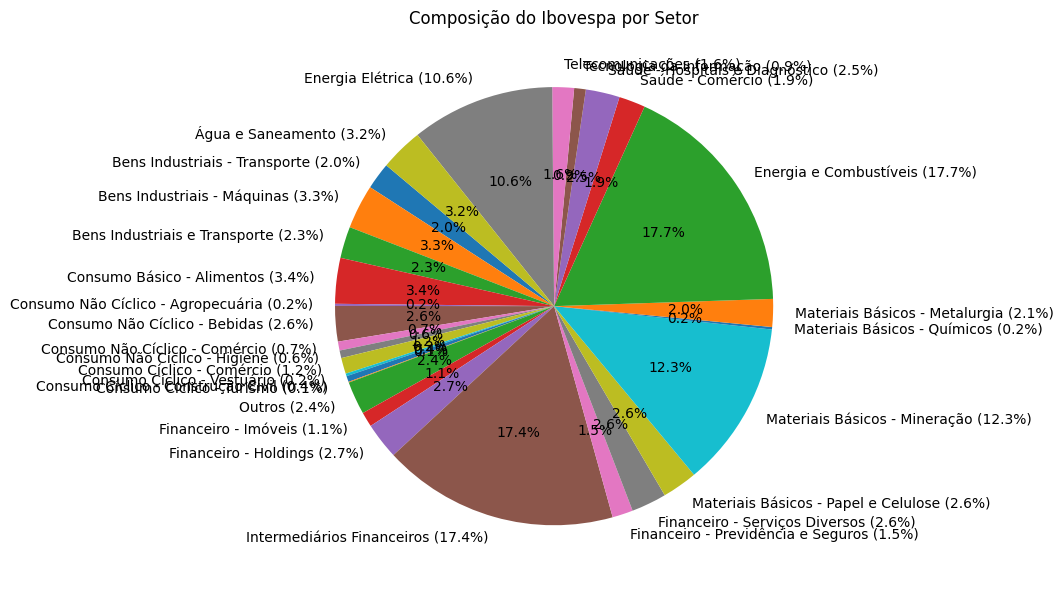

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
ibov = pd.read_csv('../data/fontes_primarias/composicao_ibovespa.csv', delimiter=';', encoding='latin1').reset_index().iloc[:, :7]
ibov.columns = ['Setor', 'Código', 'Ação', 'Tipo', 'Qtde. Teórica', 'Part. (%)', 'Part. (%) Acumulada']
ibov['Part. (%)'] = ibov['Part. (%)'].str.replace(',', '.').astype(float)

# Agrupando por setor
agrupado = ibov.groupby('Setor').sum()['Part. (%)']

# Dicionário de descrição simplificada
setor_descricao = {
    'Utilidade Pï¿½bl / Energ Elï¿½trica': 'Energia Elétrica',
    'Petrï¿½leo/ Gï¿½s e Biocombustï¿½veis': 'Energia e Combustíveis',
    'Financ e Outros / Interms Financs': 'Intermediários Financeiros',
    'Cons N  Bï¿½sico / Alimentos Processados': 'Consumo Básico - Alimentos',
    'Bens Indls/Transporte': 'Bens Industriais e Transporte',
    'Consumo Cï¿½clico / Comï¿½rcio': 'Consumo Cíclico - Comércio',
    'Diversos': 'Outros',
    'Mats Bï¿½sicos / Sid Metalurgia': 'Materiais Básicos - Metalurgia',
    'Saï¿½de/SM Hosp An.Diag': 'Saúde - Hospitais e Diagnóstico',
    'Financ e Outros / Previd  Seguros': 'Financeiro - Previdência e Seguros',
    'Financ e Outros / Explor Imï¿½veis': 'Financeiro - Imóveis',
    'Consumo Cï¿½clico/Constr Civil': 'Consumo Cíclico - Construção Civil',
    'Cons N Cï¿½clico / Comï¿½rcio Distr.': 'Consumo Não Cíclico - Comércio',
    'Mats Bï¿½sicos / Mineraï¿½ï¿½o': 'Materiais Básicos - Mineração',
    'Consumo Cï¿½clico / Tecid Vest Calï¿½': 'Consumo Cíclico - Vestuário',
    'Tec.Informaï¿½ï¿½o/Programas Servs': 'Tecnologia da Informação',
    'Saï¿½de/Comï¿½rcio Distr.': 'Saúde - Comércio',
    'Telecomunicaï¿½ï¿½o': 'Telecomunicações',
    'Mats Bï¿½sicos / Madeira e Papel': 'Materiais Básicos - Papel e Celulose',
    'Utilidade Pï¿½bl / ï¿½gua Saneamento': 'Água e Saneamento',
    'Bens Indls / Mï¿½qs e Equips': 'Bens Industriais - Máquinas',
    'Mats Bï¿½sicos / Quï¿½micos': 'Materiais Básicos - Químicos',
    'Financeiro e Outros/Serviï¿½os Financeiros Diversos': 'Financeiro - Serviços Diversos',
    'Bens Indls / Mat Transporte': 'Bens Industriais - Transporte',
    'Consumo Cï¿½clico/Viagens e Lazer': 'Consumo Cíclico - Turismo',
    'Cons N Ciclico/Agropecuï¿½ria': 'Consumo Não Cíclico - Agropecuária',
    'Cons N Cï¿½clico / Pr Pessoal Limp': 'Consumo Não Cíclico - Higiene',
    'Cons N Cï¿½clico / Bebidas': 'Consumo Não Cíclico - Bebidas',
    'Financ e Outros / Holdings Divers': 'Financeiro - Holdings',
}

# Criando as labels com descrições simplificadas
labels = [f"{setor_descricao.get(setor, 'Outros')} ({part:.1f}%)" for setor, part in zip(agrupado.index, agrupado)]

# Gerando o gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(agrupado, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Composição do Ibovespa por Setor')
plt.tight_layout()
plt.show()


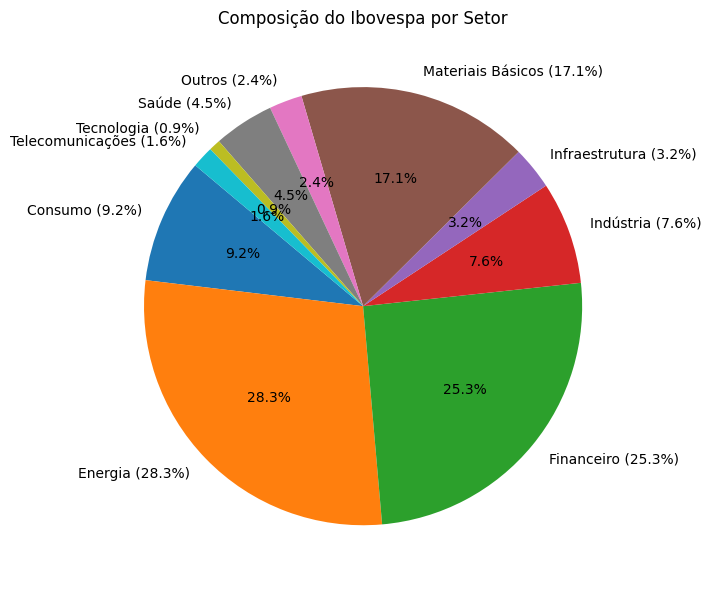

In [17]:
# Novo agrupamento por categorias maiores
setor_agrupado = {
    'Energia Elétrica': 'Energia',
    'Energia e Combustíveis': 'Energia',
    'Intermediários Financeiros': 'Financeiro',
    'Financeiro - Previdência e Seguros': 'Financeiro',
    'Financeiro - Imóveis': 'Financeiro',
    'Financeiro - Serviços Diversos': 'Financeiro',
    'Financeiro - Holdings': 'Financeiro',
    'Consumo Básico - Alimentos': 'Consumo',
    'Consumo Cíclico - Comércio': 'Consumo',
    'Consumo Cíclico - Construção Civil': 'Consumo',
    'Consumo Cíclico - Vestuário': 'Consumo',
    'Consumo Cíclico - Turismo': 'Consumo',
    'Consumo Não Cíclico - Comércio': 'Consumo',
    'Consumo Não Cíclico - Agropecuária': 'Consumo',
    'Consumo Não Cíclico - Higiene': 'Consumo',
    'Consumo Não Cíclico - Bebidas': 'Consumo',
    'Materiais Básicos - Metalurgia': 'Materiais Básicos',
    'Materiais Básicos - Mineração': 'Materiais Básicos',
    'Materiais Básicos - Papel e Celulose': 'Materiais Básicos',
    'Materiais Básicos - Químicos': 'Materiais Básicos',
    'Bens Industriais e Transporte': 'Indústria',
    'Bens Industriais - Máquinas': 'Indústria',
    'Bens Industriais - Transporte': 'Indústria',
    'Saúde - Hospitais e Diagnóstico': 'Saúde',
    'Saúde - Comércio': 'Saúde',
    'Tecnologia da Informação': 'Tecnologia',
    'Telecomunicações': 'Telecomunicações',
    'Água e Saneamento': 'Infraestrutura',
    'Outros': 'Outros'
}

# Atualizando os setores para a categoria maior
ibov['Categoria Maior'] = ibov['Setor'].map(setor_descricao).map(setor_agrupado)

# Agrupando por categoria maior
agrupado_maior = ibov.groupby('Categoria Maior').sum()['Part. (%)']

# Gerando gráfico de pizza para categorias maiores
labels_maior = [f"{categoria} ({part:.1f}%)" for categoria, part in zip(agrupado_maior.index, agrupado_maior)]

plt.figure(figsize=(10, 6))
plt.pie(agrupado_maior, labels=labels_maior, autopct='%1.1f%%', startangle=140)
plt.title('Composição do Ibovespa por Setor')
plt.tight_layout()
# save last plot in pdf
plt.savefig('composicao_exportacao.png')


In [9]:
ibov = pd.read_csv('../data/fontes_primarias/composicao_ibovespa.csv', delimiter=';',encoding='latin1').reset_index().iloc[:,:7]
print(ibov)
ibov['index'].value_counts()

                                  index   Setor      Cï¿½digo    Aï¿½ï¿½o  \
0          Bens Indls / Mï¿½qs e Equips   WEGE3           WEG  ON      NM   
1           Bens Indls / Mat Transporte   EMBR3       EMBRAER  ON      NM   
2                 Bens Indls/Transporte   AZUL4          AZUL  PN      N2   
3                 Bens Indls/Transporte   CCRO3        CCR SA  ON      NM   
4                 Bens Indls/Transporte   RAIL3     RUMO S.A.  ON      NM   
..                                  ...     ...           ...         ...   
81  Utilidade Pï¿½bl / Energ Elï¿½trica   ENEV3         ENEVA  ON      NM   
82  Utilidade Pï¿½bl / Energ Elï¿½trica   EGIE3  ENGIE BRASIL  ON      NM   
83  Utilidade Pï¿½bl / Energ Elï¿½trica   EQTL3    EQUATORIAL  ON      NM   
84  Utilidade Pï¿½bl / Energ Elï¿½trica   ISAE4   ISA ENERGIA  PN      N1   
85  Utilidade Pï¿½bl / Energ Elï¿½trica  TAEE11         TAESA  UNT EDJ N2   

             Tipo Qtde. Teï¿½rica Part. (%)  
0   1.269.032.828           3

index
Utilidade Pï¿½bl / Energ Elï¿½trica                    12
Petrï¿½leo/ Gï¿½s e Biocombustï¿½veis                   9
Financ e Outros / Interms Financs                       6
Cons N  Bï¿½sico / Alimentos Processados                5
Bens Indls/Transporte                                   4
Consumo Cï¿½clico / Comï¿½rcio                          4
Diversos                                                4
Mats Bï¿½sicos / Sid Metalurgia                         4
Saï¿½de/SM Hosp An.Diag                                 3
Financ e Outros / Previd  Seguros                       3
Financ e Outros / Explor Imï¿½veis                      3
Consumo Cï¿½clico/Constr Civil                          3
Cons N Cï¿½clico / Comï¿½rcio Distr.                    3
Mats Bï¿½sicos / Mineraï¿½ï¿½o                          3
Consumo Cï¿½clico / Tecid Vest Calï¿½                   2
Tec.Informaï¿½ï¿½o/Programas Servs                      2
Saï¿½de/Comï¿½rcio Distr.                               2
Telecomu

/tmp/ipykernel_139057/2051363917.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


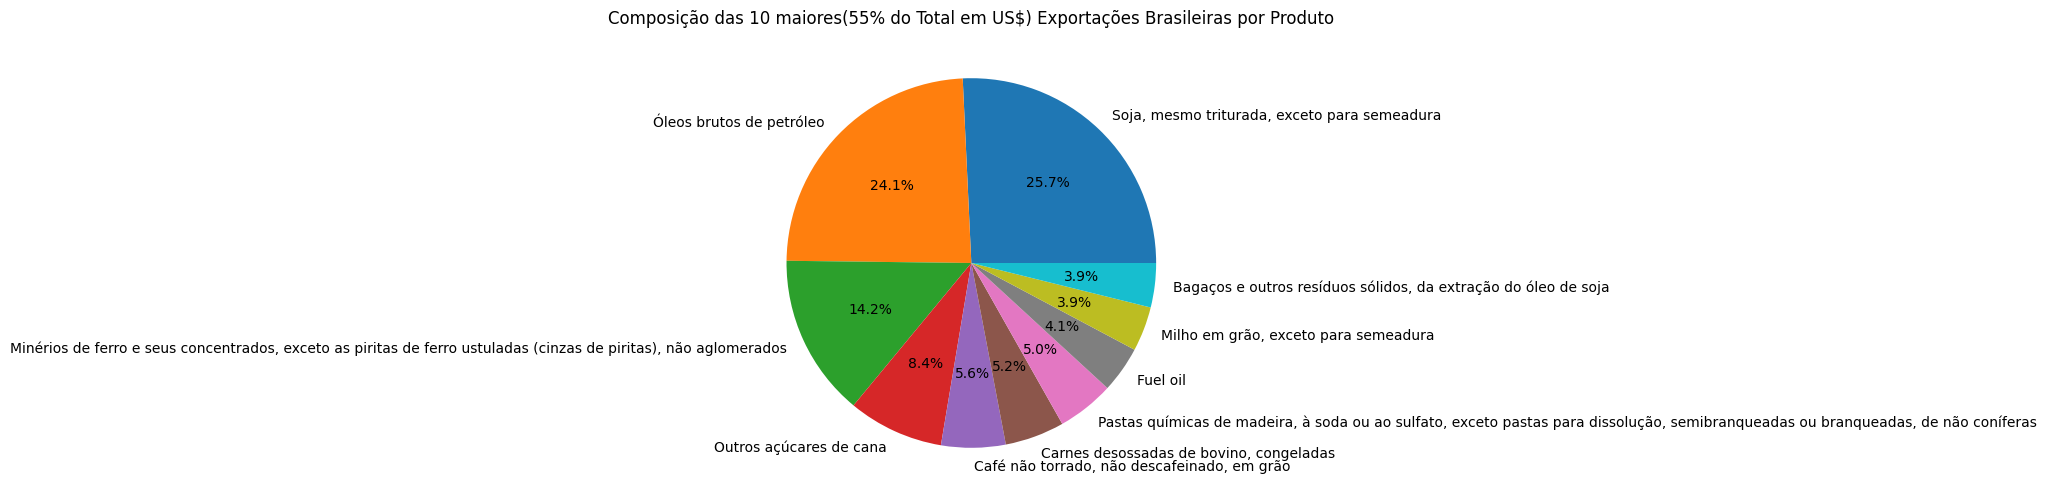

In [6]:
#Composição Exportações por Produto
exportacoes = pd.read_excel('../data/fontes_primarias/exportacao_2024.xlsx')
exportacoes.columns = ['Código NCM','Produto NCM','Valor US$']
exportacoes['Percentual'] = exportacoes['Valor US$']/exportacoes['Valor US$'].sum()*100
exportacoes = exportacoes.iloc[0:10]
#Plotar Gráfico de Pizza com Matplotlib
plt.figure(figsize=(10, 6))
plt.pie(exportacoes['Valor US$'], labels=exportacoes['Produto NCM'], autopct='%1.1f%%')
plt.title(f'Composição das 10 maiores(55% do Total em US$) Exportações Brasileiras por Produto')
plt.tight_layout()
plt.show()
